In [595]:
import numpy as np
import pandas as pd
import hypertools as hyp
import matplotlib.pyplot as plt

In [596]:
religion = pd.read_csv('religion-survey-results.csv')
religion.head()

,"What is your present religion, if any?",Unnamed: 1,Do you consider yourself to be an evangelical?,Do you attend religious services,"How often do you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)","How often do you: Pray in public using some kind of physical object (rosary, tefillin, etc)",How often do you: Pray aloud before meals in the presence of people who don't belong to your religion,How often do you: Tell someone you'll pray for him or her,How often do you: Ask or offer to pray with someone,"How often do you: Bring up your religion, unprompted, in conversation",...,How comfortable would you be seeing someone who practices a different religion from you: Ask or offer to pray with you,"How comfortable would you be seeing someone who practices a different religion from you: Bring up his or her own religion, unprompted, in conversation","How comfortable would you be seeing someone who practices a different religion from you: Ask you about your religion, unprompted, in conversation","How comfortable would you be seeing someone who practices a different religion from you: Decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)","How comfortable would you be seeing someone who practices a different religion from you: Wear religious clothing/jewelry (hijab, kippah, wig, kara, turban, cross, etc)","How comfortable would you be seeing someone who practices a different religion from you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)",What is your age?,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,Response,None of these,Response,Response,Response,Response,Response,Response,Response,Response,...,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,None of these,Wesleyan Christian,No,Weekly or more,A few times per week,Not applicable to my religious beliefs,A few times per month,A few times per week,Never,A few times per month,...,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,18 - 29,Male,"$0 to $9,999",East North Central
2,Atheist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Very comfortable,Somewhat comfortably,Very comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,18 - 29,Male,"$10,000 to $24,999",Middle Atlantic
3,Protestant,NaN,No,Weekly or more,A few times per month,Never,Once a year or less,A few times per month,A few times per month,A few times per month,...,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,18 - 29,Male,"$25,000 to $49,999",East North Central
4,Muslim,NaN,No,Weekly or more,Every day,A few times per month,Never,Once a month or less,Once a month or less,Never,...,Very comfortable,Very comfortable,Very comfortable,Very comfortable,Very comfortable,Very comfortable,18 - 29,Male,"$0 to $9,999",South Atlantic


In [597]:
# inspired by https://realpython.com/python-data-cleaning-numpy-pandas/

to_drop = ['Unnamed: 1',"How comfortable do you feel when you: Tell someone you'll pray for him or her",
       "How comfortable do you think someone outside your religion would be if they saw you: Pray aloud before meals in the presence of people who don't belong to your religion",
       "How comfortable do you think someone outside your religion would be if they saw you: Tell someone you'll pray for him or her",
       "How comfortable would you be seeing someone who practices a different religion from you: Pray aloud before meals in the presence of people who don't belong to that religion",
       'Do you consider yourself to be an evangelical?',"How often do you: Pray aloud before meals in the presence of people who don't belong to your religion",
       'Do you attend religious services',"How comfortable do you feel when you: Pray aloud before meals in the presence of people who don't belong to your religion",
       'How often do you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)',
       'How often do you: Pray in public using some kind of physical object (rosary, tefillin, etc)',
       'How often do you: Ask or offer to pray with someone',
       'How often do you: Decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)',
       'How often do you: Wear religious clothing/jewelry (hijab, kippah, wig, kara, turban, cross, etc)',
       'How often do you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)',
       'How comfortable do you feel when you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)',
       'How comfortable do you feel when you: Pray in public using some kind of physical object (rosary, tefillin, etc)',
       'How comfortable do you feel when you: Ask or offer to pray with someone',
       'How comfortable do you feel when you: Bring up your religion, unprompted, in conversation',
       'How comfortable do you feel when you: Ask others about their religion, unprompted, in conversation',
       'How comfortable do you feel when you: Decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)',
       'How comfortable do you feel when you: Wear religious clothing/jewelry (hijab, kippah, wig, kara, turban, cross, etc)',
       'How comfortable do you feel when you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)',
       'How comfortable do you think someone outside your religion would be if they saw you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)',
       'How comfortable do you think someone outside your religion would be if they saw you: Pray in public using some kind of physical object (rosary, tefillin, etc)',
       'How comfortable do you think someone outside your religion would be if they saw you: Ask or offer to pray with someone',
       'How comfortable do you think someone outside your religion would be if they saw you: Bring up your religion, unprompted, in conversation',
       'How comfortable do you think someone outside your religion would be if they saw you: Ask others about their religion, unprompted, in conversation',
       'How comfortable do you think someone outside your religion would be if they saw you: Decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)',
       'How comfortable do you think someone outside your religion would be if they saw you: Wear religious clothing/jewelry (hijab, kippah, wig, kara, turban, cross, etc)',
       'How comfortable do you think someone outside your religion would be if they saw you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)',
       'How comfortable would you be seeing someone who practices a different religion from you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)',
       'How comfortable would you be seeing someone who practices a different religion from you: Pray in public using some kind of physical object (rosary, tefillin, etc)',
       'How comfortable would you be seeing someone who practices a different religion from you: Ask or offer to pray with you',
       'How comfortable would you be seeing someone who practices a different religion from you: Bring up his or her own religion, unprompted, in conversation',
       'How comfortable would you be seeing someone who practices a different religion from you: Ask you about your religion, unprompted, in conversation',
       'How comfortable would you be seeing someone who practices a different religion from you: Decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)',
       'How comfortable would you be seeing someone who practices a different religion from you: Wear religious clothing/jewelry (hijab, kippah, wig, kara, turban, cross, etc)',
       'How comfortable would you be seeing someone who practices a different religion from you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)']
religion.drop(to_drop, inplace=True, axis=1)

#create a dictionary that specifies which columns to rename and what to rename them to
names = {'What is your present religion, if any?':'Religion',
       "How often do you: Tell someone you'll pray for him or her":"Tells",
       'How often do you: Bring up your religion, unprompted, in conversation':'BringsUp',
       'How often do you: Ask others about their religion, unprompted, in conversation':'Asks',
       'What is your age?':'Age', 'What is your gender?':'Gender',
       'How much total combined money did all members of your HOUSEHOLD earn last year?':'HouseholdIncome',
       'US Region':'Region'}
religion.rename(names, inplace=True, axis=1) #rename the given columns (specified in the dictionary)
religion.drop([0], inplace=True)

# drop rows
religion = religion[pd.notnull(religion['BringsUp'])]  # also excludes atheists

# functions to help convert ordinal data to numerical data

def age(x):
    if x == '18 - 29':
        return 18
    elif x == '30 - 44':
        return 30
    elif x == '45 - 59':
        return 45
    elif x == '60+':
        return 60
    
    
def how_often(x):
    if x == 'Never' or x =='Not applicable to my religious beliefs':
        return 0
    elif x == 'Once a year or less':
        return 1
    elif x == 'Once a month or less':
        return 2
    elif x == 'A few times per month':
        return 3
    elif x == 'A few times per week':
        return 4
    elif x == 'Every day':
        return 5
    
    
def income(x):
    if x == '$0 to $9,999':
        return 0
    elif x == '$10,000 to $24,999':
        return 10
    elif x == '$25,000to$49,999':
        return 25
    elif x == '$50,000 to $74,999':
        return 50
    elif x == '$75,000 to $99,999':
        return 75
    elif x == '$100,000 to $124,999':
        return 100
    elif x == '$125,000 to $149,999':
        return 125
    elif x == '$150,000 to $174,999':
        return 150
    elif x == '$175,000 to $199,999':
        return 175
    elif x == '$200,000 and up':
        return 200
    
    
    
# convert ordinal data to numeric using above functions
religion.loc[:,'Age'] = religion.loc[:,'Age'].apply(age)
religion.loc[:,'Tells'] = religion.loc[:,'Tells'].apply(how_often)
religion.loc[:,'BringsUp'] = religion.loc[:,'BringsUp'].apply(how_often)
religion.loc[:,'Asks'] = religion.loc[:,'Asks'].apply(how_often)
religion.loc[:,'HouseholdIncome'] = religion.loc[:,'HouseholdIncome'].apply(income)

religion = religion[pd.notnull(religion['HouseholdIncome'])]

religion.head()

,Religion,Tells,BringsUp,Asks,"How comfortable would you be seeing someone who practices a different religion from you: Tell someone ""I'll pray for you""",Age,Gender,HouseholdIncome,Region
1,None of these,4.0,3,3.0,Very comfortable,18,Male,0.0,East North Central
4,Muslim,2.0,0,1.0,Very comfortable,18,Male,0.0,South Atlantic
5,None of these,2.0,2,1.0,Somewhat comfortably,18,Male,75.0,Pacific
7,None of these,0.0,0,0.0,Extremely comfortable,18,Male,10.0,East North Central
8,Protestant,1.0,0,0.0,Extremely comfortable,18,Male,0.0,East North Central


### What I found:

By plotting the frequecy with which people ask about or bring up religion unprompted, I found Muslims and Christians are the most likely groups to bring up or ask about religion unprompted, while Buddhists, Hindus, and Jews are the least likely to. Additionally, Jews are the least likely group to tell others they'll pray for them.

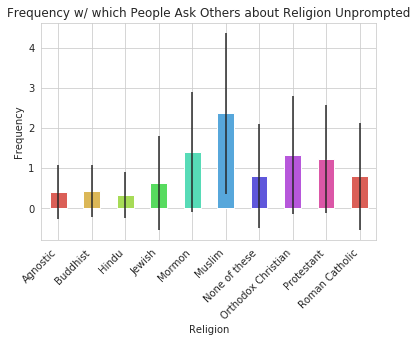

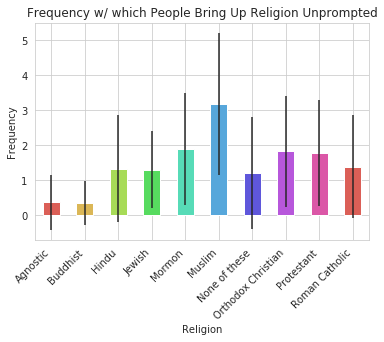

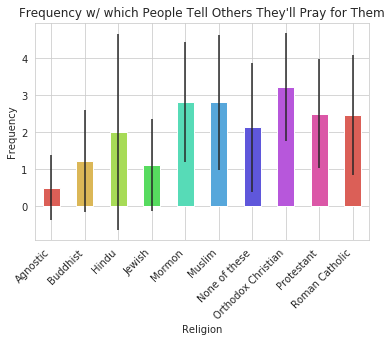

In [603]:
#inspired by Paxton Fitzpatrick's notebook 

#group religions together
rel_group = religion.groupby(['Religion'])

# Barplot 1
graph = rel_group.Asks.mean().plot(kind='bar', yerr=rel_group.Asks.std())
graph.set_xticklabels(rel_group.Asks.mean().index, rotation=45, ha='right')
graph.set_ylabel('Frequency')
graph.set_title('Frequency w/ which People Ask Others about Religion Unprompted')
plt.show()

# Barplot 2
graph = rel_group.BringsUp.mean().plot(kind='bar', yerr=rel_group.BringsUp.std())
graph.set_xticklabels(rel_group.BringsUp.mean().index, rotation=45, ha='right')
graph.set_ylabel('Frequency')
graph.set_title('Frequency w/ which People Bring Up Religion Unprompted')
plt.show()

# Barplot 3
graph = rel_group.Tells.mean().plot(kind='bar', yerr=rel_group.Tells.std())
graph.set_xticklabels(rel_group.Tells.mean().index, rotation=45, ha='right')
graph.set_ylabel('Frequency')
graph.set_title("Frequency w/ which People Tell Others They'll Pray for Them")
plt.show()

In [604]:
#  inspired by https://stackoverflow.com/questions/31789160/convert-select-columns-in-pandas-dataframe-to-numpy-array

rel_info = religion.iloc[:,[1,2,3,5,7]].as_matrix()
print(rel_info)




[[  4.   3.   3.  18.   0.]
 [  2.   0.   1.  18.   0.]
 [  2.   2.   1.  18.  75.]
 ...
 [  0.   0.   0.  18.  10.]
 [  4.   0.   0.  45. 200.]
 [  1.   1.   1.  18.   0.]]


/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/hypertools/tools/format_data.py:141: UserWarning: Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)
  warnings.warn('Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)')


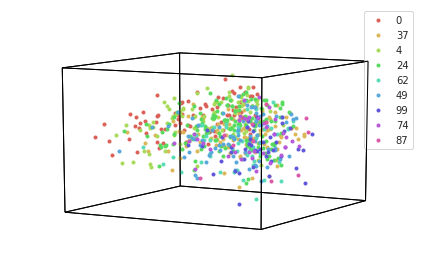

array([  1.,   3.,   0.,  45., 150.])

In [602]:
# plot visualized by household income groups
plot = hyp.plot(religion, '.', hue=religion.HouseholdIncome, legend=True)

#obtain info for people whose household income is above 100k
high_inc = rel_info[:,4]>100

# look at array of wealthy people
rel_info[high_inc,:][3]



